In [4]:
import numpy as np
import pandas as pd 
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt



In [5]:
# URIS CHECK git

# Assuming your DataFrame is named 'df' and the column is named 'date_column'

# Function to convert the date format
def convert_date(date_str):
    # Parse the date string into a datetime object
    date = datetime.strptime(date_str, '%b-%Y')
    # Format the datetime object into the desired format
    formatted_date = date.strftime('%d/%m/%Y')
    return formatted_date


In [120]:
Q1_19 = pd.read_csv("Q1_2019.csv",low_memory=False)
Q2_19 = pd.read_csv("Q2_2019.csv",low_memory=False)
Q3_19 = pd.read_csv("Q3_2019.csv",low_memory=False)
Q4_19 = pd.read_csv("Q4_2019.csv",low_memory=False)

In [122]:
Q1_18 = pd.read_csv("Q1_2018.csv",low_memory=False)
Q2_18 = pd.read_csv("Q2_2018.csv",low_memory=False)
Q3_18 = pd.read_csv("Q3_2018.csv",low_memory=False)
Q4_18 = pd.read_csv("Q4_2018.csv",low_memory=False)

In [123]:
Q1_18["Qrtr"] = 1
Q2_18["Qrtr"] = 2
Q3_18["Qrtr"] = 3
Q4_18["Qrtr"] = 4
Q1_19["Qrtr"] = 1
Q2_19["Qrtr"] = 2
Q3_19["Qrtr"] = 3
Q4_19["Qrtr"] = 4

In [124]:
# making 2 big Date Frames
all_year_19 = pd.concat([Q1_19,Q2_19,Q3_19,Q4_19])
all_year_18 = pd.concat([Q1_18,Q2_18,Q3_18,Q4_18])

In [125]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.options.display.max_rows


500

In [126]:
# have a look
all_year_19.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Qrtr
0,76143686,NaN,9000,9000,9000.0,36 months,15.31%,313.36,C,C5,Senior Case Assistant,9 years,RENT,52000.0,Source Verified,Mar-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,945xx,CA,18.86,0,Nov-1999,665,669,0.0,24.0,NaN,6,0,11713,73.7%,13,w,0.00,0.00,10193.651743,10193.65,9000.00,1193.65,0.0,0.00,0.0000,Mar-2017,7064.14,NaN,Oct-2018,699,695,0,NaN,1,Individual,NaN,NaN,NaN,0,0,52953,2.0,1.0,1.0,1.0,4.0,41240.0,NaN,3.0,3.0,3789.0,74.0,15900,0.0,1.0,2.0,4,8826,4187.0,73.7,0,0,125.0,196,1,1,0,1.0,NaN,4.0,NaN,0,5,5,5,9,3,5,10,5,6,0.0,0,0,4,92.3,80.0,0,0,58425,52953,15900,42525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,1
1,76132182,NaN,24000,24000,24000.0,60 months,6.49%,469.48,A,A2,Production Manager,10+ years,MORTGAGE,92000.0,Not Verified,Mar-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,370xx,TN,11.77,0,Mar-2002,765,769,0.0,NaN,NaN,18,0,22950,21.6%,27,w,9712.74,9712.74,17822.930000,17822.93,14287.26,3535.67,0.0,0.00,0.0000,May-2019,469.48,Jul-2019,Jun-2019,814,810,0,NaN,1,Individual,NaN,NaN,NaN,0,0,131135,0.0,1.0,1.0,1.0,10.0,6038.0,79.0,1.0,4.0,9467.0,25.0,106400,0.0,0.0,2.0,5,7285,52435.0,21.2,0,0,122.0,168,11,10,2,20.0,NaN,9.0,NaN,0,3,9,8,12,4,16,21,9,18,0.0,0,0,2,100.0,0.0,0,0,232603,28988,66500,7665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,1
2,76143234,NaN,8000,

In [127]:
all_year_19.dtypes

id                                              int64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

# Begining Initial Data Filtering

We have decided to focus our study on loans that are Mature with a term of 36 months as we are considering loans where we can study their entire lifetime, and not have biased data on loans which are still alive

In [130]:
ids_that_are_relevant = all_year_19[(all_year_19.term == " 36 months") & (all_year_19.loan_status.isin(["Default","Charged Off","Fully Paid"]))].id
(all_year_19.shape[0] - len(ids_that_are_relevant))/all_year_19.shape[0] 


0.3794114735720189

In [131]:
all_year_19 = all_year_19[all_year_19['id'].isin(ids_that_are_relevant)]
all_year_18 = all_year_18[all_year_18['id'].isin(ids_that_are_relevant)]

Bellow we are removing columns which exist in 2018 but not 2019

In [132]:
# Get a list of columns in each dataframe
cols_18 = set(all_year_18.columns)
cols_19 = set(all_year_19.columns)

# Find columns that are in one dataframe but not the other
missing_cols = [col for col in cols_18.symmetric_difference(cols_19)]

# Print the missing columns, if any
if missing_cols:
    print("Columns missing in one of the dataframes:")
    for col in missing_cols:
        if col in cols_18:
            print(f"Column '{col}' is missing in 'all_year_19'")
        else:
            print(f"Column '{col}' is missing in 'all_year_18'")
else:
    print("All columns match between the two dataframes.")

Columns missing in one of the dataframes:
Column 'disbursement_method' is missing in 'all_year_19'


In [133]:
missing_cols

['disbursement_method']

In [134]:
all_year_18 = all_year_18.drop(columns=missing_cols) 

In [135]:
# in order to compare the loans across years we are will sort the ids and compare them
# Sort by id
all_year_18 = all_year_18.sort_values(by="id").reset_index(drop=True)
all_year_19 = all_year_19.sort_values(by="id").reset_index(drop=True)

## Handiling N/A

In [136]:
all_year_19[all_year_19.settlement_term.notna() == True ]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Qrtr
36,666933,NaN,11200,11200,11200.0,36 months,15.59%,391.50,C,C5,Teacher,10+ years,MORTGAGE,42000.0,Source Verified,Aug-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,705xx,LA,22.77,0,Oct-1991,680,684,1.0,28.0,110.0,9,1,12159,77%,29,f,0.0,0.0,5621.80,5621.80,2888.73,1408.07,0.00,1325.00,238.500,Jul-2017,391.50,NaN,Jun-2019,609,605,0,30.0,1,Individual,NaN,NaN,NaN,0,0,80610,0.0,1.0,0.0,0.0,49.0,5765.0,32.0,2.0,4.0,3949.0,53.0,15800,0.0,0.0,3.0,4,8957,171.0,97.7,0,0,297.0,104,8,8,1,17.0,28.0,0.0,28.0,1,2,7,2,8,14,7,14,7,9,0.0,0,0,2,72.4,100.0,1,0,104243,17924,7300,18243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Sep-2018,ACTIVE,Aug-2018,3991.83,45.00,17.0,3
67,1396078,NaN,6000,6000,6000.0,36 months,16.99%,213.89,D,D1,electronic engineer III,10+ years,MORTGAGE,75000.0,Source Verified,Jul-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,856xx,AZ,34.42,0,Nov-2002,675,679,0.0,NaN,NaN,11,0,28954,82%,23,w,0.0,0.0,4055.26,4055.26,801.55,470.46,0.00,2783.25,500.985,Jan-2017,213.89,NaN,Feb-2019,534,530,0,NaN,1,Individual,NaN,NaN,NaN,0,0,196057,0.0,3.0,1.0,2.0,10.0,54916.0,86.0,0.0,0.0,10935.0,84.0,35300,2.0,1.0,1.0,4,17823,2441.0,90.1,0,0,122.0,95,26,10,6,26.0,NaN,10.0,NaN,0,5,7,5,5,9,7,8,7,11,0.0,0,0,1,100.0,80.0,0,0,218673,83870,24700,69003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Mar-2019,COMPLETE,Oct-2017,2783.23,5

In [137]:
all_year_19.isna().sum() /  len(all_year_19)

id                                            0.000000
member_id                                     1.000000
loan_amnt                                     0.000000
funded_amnt                                   0.000000
funded_amnt_inv                               0.000000
term                                          0.000000
int_rate                                      0.000000
installment                                   0.000000
grade                                         0.000000
sub_grade                                     0.000000
emp_title                                     0.072436
emp_length                                    0.071947
home_ownership                                0.000000
annual_inc                                    0.000000
verification_status                           0.000000
issue_d                                       0.000000
loan_status                                   0.000000
pymnt_plan                                    0.000000
url       

After looking at the data and the percentage of nas in every specific column we decided to remove all data with more than 95% Na's

In [138]:
COLUMNS_REMOVED_BECAUSE_OF_NA = all_year_19.columns[all_year_19.isna().sum() >= len(all_year_19)*0.95] 



In [139]:
DF_FILTERED_OUT_COLUMNS = all_year_19[COLUMNS_REMOVED_BECAUSE_OF_NA]

What we are doing bellow is finding all columns with less than 95% na values in 2019 from all datasets

In [140]:
all_year_19 = all_year_19[all_year_19.columns] \
    .drop(columns=COLUMNS_REMOVED_BECAUSE_OF_NA)

In [141]:
all_year_18 = all_year_18[all_year_19.columns]

# Here we are removing columns that are only unique values

In [142]:
all_year_19.columns[all_year_19.nunique() == 1]

Index(['term', 'pymnt_plan', 'policy_code', 'hardship_flag'], dtype='object')

In [143]:
UNIQUE_COLUMNS = all_year_19.columns[all_year_19.nunique() == 1]

In [144]:
for column in UNIQUE_COLUMNS:
    DF_FILTERED_OUT_COLUMNS[column] = all_year_19[column]

In [145]:
all_year_19 = all_year_19[all_year_19.columns] \
    .drop(columns=UNIQUE_COLUMNS)

In [146]:
all_year_18 = all_year_18[all_year_19.columns]

In [147]:
UNIQUE_COLUMNS

Index(['term', 'pymnt_plan', 'policy_code', 'hardship_flag'], dtype='object')

## Columns to remove becasue of data leakage

In [148]:
DATA_LEAKAGE_COLUMNS = []
# Columns to drop by number of N/A's

DATA_LEAKAGE_COLUMNS += (list(all_year_19.columns[all_year_18.isna().sum()!=all_year_19.isna().sum()]))


In [149]:
DATA_LEAKAGE_COLUMNS

['last_credit_pull_d']

In [150]:
percentage_change = ((np.sum(all_year_18 != all_year_19) - np.sum(all_year_19.isna())) / all_year_19.shape[0])

In [151]:
percentage_change

id                                0.000000
loan_amnt                         0.000000
funded_amnt                       0.000000
funded_amnt_inv                   0.000000
int_rate                          0.000104
installment                       0.000108
grade                             0.000000
sub_grade                         0.000000
emp_title                         0.000000
emp_length                        0.000000
home_ownership                    0.000000
annual_inc                        0.000000
verification_status               0.017430
issue_d                           0.000000
loan_status                       0.506217
url                               0.000000
purpose                           0.000000
title                             0.000000
zip_code                          0.000000
addr_state                        0.000000
dti                               0.000000
delinq_2yrs                       0.000000
earliest_cr_line                  0.000000
fico_range_

In [152]:
percentage_change[(percentage_change >= .05 )]

loan_status                0.506217
out_prncp                  0.506039
out_prncp_inv              0.506039
total_pymnt                0.534341
total_pymnt_inv            0.534126
total_rec_prncp            0.480941
total_rec_int              0.482748
recoveries                 0.075348
collection_recovery_fee    0.075348
last_pymnt_d               0.474194
last_pymnt_amnt            0.451118
last_credit_pull_d         0.811983
last_fico_range_high       0.753231
last_fico_range_low        0.753231
dtype: float64

In [153]:
percentage_change[(percentage_change <= .05 ) & (percentage_change!=0)]

int_rate                0.000104
installment             0.000108
verification_status     0.017430
total_rec_late_fee      0.024938
debt_settlement_flag    0.019400
dtype: float64

In [154]:
percentage_change[percentage_change!=0]

int_rate                   0.000104
installment                0.000108
verification_status        0.017430
loan_status                0.506217
out_prncp                  0.506039
out_prncp_inv              0.506039
total_pymnt                0.534341
total_pymnt_inv            0.534126
total_rec_prncp            0.480941
total_rec_int              0.482748
total_rec_late_fee         0.024938
recoveries                 0.075348
collection_recovery_fee    0.075348
last_pymnt_d               0.474194
last_pymnt_amnt            0.451118
last_credit_pull_d         0.811983
last_fico_range_high       0.753231
last_fico_range_low        0.753231
debt_settlement_flag       0.019400
dtype: float64

In [155]:
columns_to_keep_for_targetting = ['loan_status','total_pymnt','recoveries', \
                                  'last_pymnt_d']
columns_to_keep_with_low_leakage_rate = ['int_rate','installment','verification_status']


In [156]:
percentage_change = percentage_change[percentage_change != 0]

In [157]:
percentage_change_to_drop = percentage_change.loc[(~percentage_change.index.isin(columns_to_keep_for_targetting)) & (~percentage_change.index.isin(columns_to_keep_with_low_leakage_rate))]


In [158]:
(percentage_change_to_drop.index)

Index(['out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high',
       'last_fico_range_low', 'debt_settlement_flag'],
      dtype='object')

In [159]:
DATA_LEAKAGE_COLUMNS += (list(percentage_change_to_drop.index))

In [160]:
DATA_LEAKAGE_COLUMNS

['last_credit_pull_d',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'debt_settlement_flag']

In [161]:
for column in DATA_LEAKAGE_COLUMNS:
    DF_FILTERED_OUT_COLUMNS[column] = all_year_19[column]

In [162]:
all_year_19 = all_year_19[all_year_19.columns] \
    .drop(columns=DATA_LEAKAGE_COLUMNS)

In [163]:
for col_name in columns_to_keep_for_targetting:
    if col_name == 'last_pymnt_d':
        continue
    all_year_19.rename(columns={col_name: f'target_{col_name}' }, inplace=True)

# <font color=blue> Above we have completed our initial filtration and now we are moving on to specific column EDA

# Creating Columns to calculate our target interest rate

In [164]:
# Here we are casting column to string
all_year_19['last_pymnt_d'] = all_year_19['last_pymnt_d'].astype(str)
all_year_19['issue_d'] = all_year_19['issue_d'].astype(str)
all_year_18['issue_d'] = all_year_18['issue_d'].astype(str)
all_year_19['last_pymnt_d'] = all_year_19['last_pymnt_d'].replace('nan', 'Jan-2010')

# Apply the conversion function to the column
all_year_19['last_pymnt_d'] = all_year_19['last_pymnt_d'].apply(convert_date)
all_year_19['issue_d'] = all_year_19['issue_d'].apply(convert_date)


all_year_19['last_pymnt_d'] = pd.to_datetime(all_year_19['last_pymnt_d'], format='%d/%m/%Y')
all_year_19['issue_d'] = pd.to_datetime(all_year_19['issue_d'], format='%d/%m/%Y')

all_year_19['loan_lifetime_in_months'] = ((all_year_19.last_pymnt_d - all_year_19.issue_d)/np.timedelta64(1, 'M'))
all_year_19['loan_lifetime_in_months'] = all_year_19['loan_lifetime_in_months'].astype(float)




In [165]:
# giving a value of 0 for loans with not a singe payment.
all_year_19['loan_lifetime_in_months'] = all_year_19['loan_lifetime_in_months'].clip(lower=1) 

In [166]:
all_year_19['loan_lifetime_in_months'].describe()

count    269588.000000
mean         20.988609
std          11.042880
min           1.000000
25%          11.992033
50%          20.961416
75%          31.015011
max          40.970040
Name: loan_lifetime_in_months, dtype: float64

# Creating a calculated interest return rate columns:


In [50]:
all_year_19["estimated_monthly_paymnent"] = all_year_19["target_total_pymnt"] / all_year_19["loan_lifetime_in_months"]

In [51]:
all_year_19["estimated_monthly_paymnent"].describe()

count    269588.000000
mean       1127.294861
std        2373.264062
min           0.000000
25%         312.091494
50%         561.695987
75%        1052.060739
max       41058.410000
Name: estimated_monthly_paymnent, dtype: float64

In [52]:
m = np.array(all_year_19["loan_lifetime_in_months"]) # month from start to finish
t = 36 # only 36 months terms
p = np.array(all_year_19.target_total_pymnt) # total return
f = np.array(all_year_19.funded_amnt) # total invesment
i = (0.02+1)**(1/12)-1 # i = alternative reinvesment monthly rate 
i 
# realised = (1/f) * ( ( (p/m)( (1-(1+i)*m) / (1-(1+i)) ) ) * (1+i)*(t-m) - f )

0.0016515813019202241

In [53]:
all_year_19['target_realised_return'] = (((1/f) * ( ( (p/m)*( (1-(1+i)**m) / (1-(1+i)) ) ) * (1+i)**(t-m) - f ))+1)**(12/t)-1



In [54]:
all_year_19['target_realised_return'].describe()

count    269588.000000
mean          0.014444
std           0.111046
min          -1.000000
25%           0.032724
50%           0.048992
75%           0.065244
max           0.319880
Name: target_realised_return, dtype: float64

# Deep EDA column specific
Here we are looking at ways to replace NA's. based on number and distribution relative to target varriable

In [55]:
IRRELEVANT_COLUMNS = ['funded_amnt_inv','url','zip_code','num_tl_120dpd_2m','num_tl_30dpd']
TO_DUMIFY = []
POTENTIAL_DATA_LEAKAG = []

In [56]:
all_year_19.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'target_loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'target_total_pymnt', 'target_recoveries',
       'last_pymnt_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total

In [57]:
for col_name in ['sub_grade','grade']:
    all_year_19.rename(columns={col_name: f'target_{col_name}' }, inplace=True)

In [58]:
for column in IRRELEVANT_COLUMNS:
    DF_FILTERED_OUT_COLUMNS[column] = all_year_19[column]

all_year_19 = all_year_19[all_year_19.columns] \
    .drop(columns=IRRELEVANT_COLUMNS)

In [59]:
all_year_19["target_realised_return"].mean()

0.014444469974349476

In [60]:
# before replacing na's we need to see they are not an indication to the target varriable
for i in all_year_19.columns : 
    n = all_year_19[i].isna().sum() 
    if n > 0 :
        realised_return = all_year_19[all_year_19[i].isna()]["target_realised_return"].mean()
        print(i,realised_return,n)

emp_title -0.003519654975203884 19528
emp_length -0.003462961808347731 19396
title 0.010295280557509452 14615
dti 0.016770655965160263 35
mths_since_last_delinq 0.014342208288543604 127178
mths_since_last_record 0.015649626897803286 216555
revol_util 0.018919880551783043 179
mths_since_last_major_derog 0.015155228493018102 190455
open_acc_6m 0.012470705519267787 44
open_act_il 0.012470705519267787 44
open_il_12m 0.012470705519267787 44
open_il_24m 0.012470705519267787 44
mths_since_rcnt_il 0.014692874725470102 8149
total_bal_il 0.012470705519267787 44
il_util 0.017746635926194767 37560
open_rv_12m 0.012470705519267787 44
open_rv_24m 0.012470705519267787 44
max_bal_bc 0.012470705519267787 44
all_util 0.018340745305163875 60
inq_fi 0.012470705519267787 44
total_cu_tl 0.012470705519267787 44
inq_last_12m 0.012470705519267787 44
bc_open_to_buy 0.014591246417920856 3104
bc_util 0.014159673843722577 3240
mo_sin_old_il_acct 0.0146635424578386 8110
mths_since_recent_bc 0.015558021492735337 292

In [61]:
na_rate = (all_year_19.isna().sum() /  len(all_year_19))

In [62]:
na_rate_ge0 = na_rate[(na_rate > 0)]

In [63]:
na_rate_ge0

emp_title                         0.072436
emp_length                        0.071947
title                             0.054212
dti                               0.000130
mths_since_last_delinq            0.471749
mths_since_last_record            0.803281
revol_util                        0.000664
mths_since_last_major_derog       0.706467
open_acc_6m                       0.000163
open_act_il                       0.000163
open_il_12m                       0.000163
open_il_24m                       0.000163
mths_since_rcnt_il                0.030228
total_bal_il                      0.000163
il_util                           0.139324
open_rv_12m                       0.000163
open_rv_24m                       0.000163
max_bal_bc                        0.000163
all_util                          0.000223
inq_fi                            0.000163
total_cu_tl                       0.000163
inq_last_12m                      0.000163
bc_open_to_buy                    0.011514
bc_util    

In [64]:
all_year_19['title'].isna().sum()

14615

In [65]:
column = 'emp_length'

In [66]:
all_year_19[all_year_19[column].isna()]['target_realised_return'].mean()
all_year_19[all_year_19[column].isna()]['target_realised_return'].mean()

-0.003462961808347731

In [67]:
all_year_19[all_year_19[column] == '< 1 year']['target_realised_return'].mean()

0.012880870408663625

In [68]:
distribution_dictionary = {}
for column in na_rate_ge0.index:
#     print(column)
    distribution = pd.DataFrame(columns=["Value", "Count", "Return on Investment Average", "Percentage"])

    unique_values = all_year_19[column].value_counts()
    num_unique_values = len(unique_values)

    for value in unique_values.index[:30]:
        distribution.loc[len(distribution)] = {
            "Value": value,
            "Count": unique_values[value],
            "Return on Investment Average": all_year_19[all_year_19[column] == value]['target_realised_return'].mean(),
            "Percentage": (unique_values[value] / all_year_19.shape[0]) * 100
        }

    distribution.loc[len(distribution)] = {
            "Value": 'na',
            "Count": all_year_19[column].isna().sum(),
            "Return on Investment Average": all_year_19[all_year_19[column].isna()]['target_realised_return'].mean(),
            "Percentage": (all_year_19[column].isna().sum() / all_year_19.shape[0]) * 100
        }
    distribution_dictionary[column] = distribution


In [69]:
def fill_nas_with(df, column_name, replace_with):
    df[column_name].fillna(replace_with, inplace=True)
    return df    

In [70]:
# Column check 'emp_length' 
# na's will get value 0 becasue they have their own distinct relationship to the target, and it might indicate a 
# no employment at all. the rest will have consecutive values of 0-10
# dic
print(distribution_dictionary['emp_length'])


# Assuming 'df' is your DataFrame and 'column_name' is the name of the column you want to change
conversion_dict = {
    "10+ years": 11,
    "< 1 year": 1,
    "1 year": 2,
    "2 years": 3,
    "3 years": 4,
    "4 years": 5,
    "5 years": 6,
    "6 years": 7,
    "7 years": 8,
    "8 years": 9,
    "9 years": 10,
    None: 0
}

all_year_19['emp_length'] = all_year_19['emp_length'].map(conversion_dict)

        Value  Count  Return on Investment Average  Percentage
0   10+ years  88430                      0.018400   32.801905
1     2 years  25302                      0.014752    9.385433
2     3 years  22204                      0.013304    8.236272
3    < 1 year  20897                      0.012881    7.751458
4      1 year  18612                      0.012269    6.903868
5     5 years  16549                      0.015605    6.138626
6     4 years  16120                      0.015305    5.979495
7     8 years  11613                      0.016011    4.307684
8     6 years  11499                      0.016335    4.265398
9     9 years  10299                      0.016805    3.820274
10    7 years   8667                      0.013396    3.214906
11         na  19396                     -0.003463    7.194682


In [71]:
'''check column title
Based on what we see, the NA is considered as a category of its own: Unkown
because if the title is unknown then we'''

'check column title\nBased on what we see, the NA is considered as a category of its own: Unkown\nbecause if the title is unknown then we'

In [72]:
distribution_dictionary['title']

,Value,Count,Return on Investment Average,Percentage
0,Debt consolidation,140580,0.013894,52.146238
1,Credit card refinancing,54424,0.019049,20.187842
2,Other,19112,0.013904,7.089336
3,Home improvement,18608,0.015075,6.902384
4,Major purchase,6585,0.012618,2.442616
5,Medical expenses,3523,0.004278,1.306809
6,Car financing,3203,0.021014,1.188109
7,Business,2919,-0.001559,1.082763
8,Vacation,2310,0.013280,0.856863
9,Moving and relocation,2271,0.005184,0.842397


In [73]:
all_year_19 = fill_nas_with(all_year_19, 'title', 'Unknown')

In [74]:
all_year_19.title.value_counts()


Debt consolidation           140580
Credit card refinancing       54424
Other                         19112
Home improvement              18608
Unknown                       14615
Major purchase                 6585
Medical expenses               3523
Car financing                  3203
Business                       2919
Vacation                       2310
Moving and relocation          2271
Home buying                    1235
Green loan                      202
Credit Card Consolidation         1
Name: title, dtype: int64

In [75]:
TO_DUMIFY.append('title')

In [76]:
'''check column dti
In this case NAs make a small contribution to the data, we will simply replace it with the median value'''
distribution_dictionary['dti']


,Value,Count,Return on Investment Average,Percentage
0,18.0,204,0.012259,0.075671
1,19.2,200,0.011767,0.074187
2,12.0,196,0.017120,0.072704
3,16.8,195,0.012440,0.072333
4,10.8,182,0.025396,0.067510
5,13.2,179,0.029319,0.066398
6,15.6,176,0.025454,0.065285
7,14.4,174,0.012903,0.064543
8,20.4,172,0.011806,0.063801
9,21.6,166,0.008322,0.061575


/Users/urisegman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


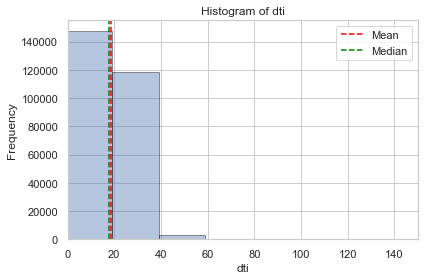

In [77]:
sns.set(style="whitegrid")
ax = sns.distplot(all_year_19['dti'], kde=False, hist_kws={'edgecolor': 'black'})
ax.axvline(all_year_19['dti'].mean(), color='red', linestyle='--', label='Mean')
ax.axvline(all_year_19['dti'].median(), color='green', linestyle='--', label='Median')
ax.set_xlabel('dti')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of dti')
ax.set_xlim(0, 150) 
ax.legend()
plt.tight_layout()
plt.show()

In [78]:
print("the median is: ", np.median(all_year_19['dti'].dropna()))
value_to_replace_dti_nas = np.median(all_year_19['dti'].dropna())
all_year_19 = fill_nas_with(all_year_19, 'dti', value_to_replace_dti_nas)                                

the median is:  17.85


In [79]:
all_year_19['dti'].describe()


count    269588.000000
mean         18.576365
std          10.556194
min          -1.000000
25%          11.900000
50%          17.850000
75%          24.630000
max         999.000000
Name: dti, dtype: float64

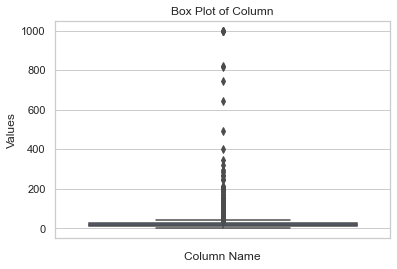

In [80]:
sns.boxplot(data=all_year_19, y='dti')
plt.xlabel('Column Name')
plt.ylabel('Values')
plt.title('Box Plot of Column')
plt.show()

In [81]:
'''Shai:
summery of looking into na's: 

column = 'il_util'
# we will replace the na with the median value bc it is normally dist. 

col = 'total_bal_il' 

# we will replace the na with the median 

# col - revol_util
# for this col we will take the median

cols we think might have D.L: 
# col - mths_since_rcnt_il  
# col - open_il_24m
# col - open_il_12m
# col - open_act_il
# col - open_acc_6m'''

"Shai:\nsummery of looking into na's: \n\ncolumn = 'il_util'\n# we will replace the na with the median value bc it is normally dist. \n\ncol = 'total_bal_il' \n\n# we will replace the na with the median \n\n# col - revol_util\n# for this col we will take the median\n\ncols we think might have D.L: \n# col - mths_since_rcnt_il  \n# col - open_il_24m\n# col - open_il_12m\n# col - open_act_il\n# col - open_acc_6m"

In [82]:
POTENTIAL_DATA_LEAKAG += ['mths_since_rcnt_il','open_il_24m','open_il_12m','open_act_il','open_acc_6m']

In [83]:
POTENTIAL_DATA_LEAKAG.append('mths_since_last_delinq')
POTENTIAL_DATA_LEAKAG.append('mths_since_last_record')      

In [84]:
# col - revol_util
# Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

distribution_dictionary['revol_util']


,Value,Count,Return on Investment Average,Percentage
0,0%,1315,0.013592,0.487781
1,57%,567,0.004539,0.210321
2,48%,560,0.008578,0.207724
3,51%,559,0.001053,0.207353
4,55%,542,0.009381,0.201048
5,58%,534,0.006184,0.198080
6,62%,531,0.010105,0.196967
7,54%,530,0.003341,0.196596
8,61%,530,0.011626,0.196596
9,42%,528,0.004534,0.195854


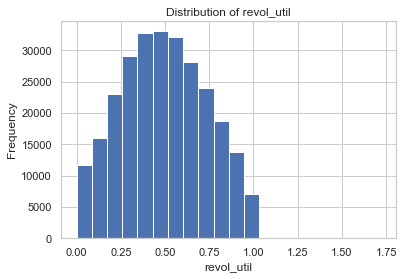

In [85]:

# remove the percentage sign from the 'revol_util' column and convert it to floats
revol_util_numeric = all_year_19['revol_util'].str.rstrip('%').astype('float') / 100

# plot the histogram
plt.hist(revol_util_numeric, bins=20)
plt.xlabel('revol_util')
plt.ylabel('Frequency')
plt.title('Distribution of revol_util')
plt.show()

In [86]:
all_year_19['revol_util']

0            74%
1          35.4%
2          81.9%
3            26%
4         100.5%
           ...  
269583     10.5%
269584     36.7%
269585     57.5%
269586     39.6%
269587     79.6%
Name: revol_util, Length: 269588, dtype: object

In [87]:
all_year_19['revol_util'] = all_year_19['revol_util'].str.rstrip('%').astype(float) / 100


In [88]:
revol_util_na_val = np.mean(all_year_19['revol_util'])

In [89]:
all_year_19 = fill_nas_with(all_year_19, 'revol_util', revol_util_na_val)                                

In [90]:
# col - total_bal_il
distribution_dictionary['total_bal_il']

,Value,Count,Return on Investment Average,Percentage
0,0.0,30642,0.017019,11.366233
1,9500.0,28,-0.008836,0.010386
2,10000.0,25,0.017052,0.009273
3,5500.0,21,-0.026029,0.007790
4,5000.0,19,0.008607,0.007048
5,4750.0,17,0.032744,0.006306
6,3000.0,17,0.032350,0.006306
7,2000.0,17,0.004917,0.006306
8,17849.0,16,0.036614,0.005935
9,13999.0,15,0.018266,0.005564


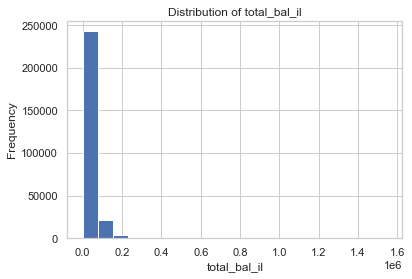

In [91]:
# plot the histogram
plt.hist(all_year_19['total_bal_il'] , bins=20)
plt.xlabel('total_bal_il')
plt.ylabel('Frequency')
plt.title('Distribution of total_bal_il')
plt.show()

In [92]:
np.mean(all_year_19['total_bal_il'])

33719.986484581364

In [93]:
all_year_19 = fill_nas_with(all_year_19, 'total_bal_il', np.mean(all_year_19['total_bal_il']))                                

In [94]:
# for column il_util
distribution_dictionary['il_util']

,Value,Count,Return on Investment Average,Percentage
0,83.0,4699,0.008788,1.743030
1,78.0,4611,0.013166,1.710388
2,85.0,4611,0.012401,1.710388
3,81.0,4585,0.009264,1.700743
4,82.0,4577,0.009519,1.697776
5,75.0,4577,0.015999,1.697776
6,86.0,4557,0.007023,1.690357
7,80.0,4515,0.010662,1.674778
8,84.0,4450,0.009464,1.650667
9,79.0,4402,0.009672,1.632862


In [95]:
Mean_il_util = np.mean(distribution_dictionary['il_util']['Return on Investment Average'])

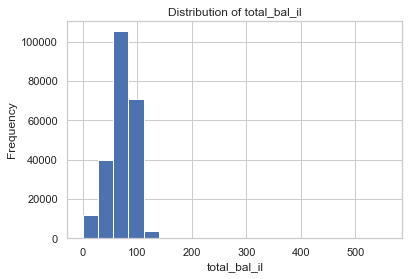

In [96]:
plt.hist(all_year_19['il_util'] , bins=20)
plt.xlabel('total_bal_il')
plt.ylabel('Frequency')
plt.title('Distribution of total_bal_il')
plt.show()

In [97]:
all_year_19 = fill_nas_with(all_year_19, 'il_util', Mean_il_util)                                


mean_target_realised_return = np.mean(all_year_19['target_realised_return'])

total na's : 3127
delta of na rlsd rtrn : 0.0003150903672163724


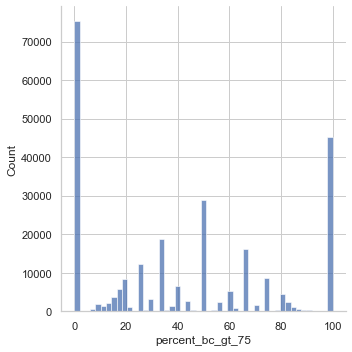

In [98]:
# column check "percent_bc_gt_75"

# Percentage of all bankcard accounts > 75% of limit.sns.distplot(all_year_19["mo_sin_old_il_acct"])

sns.displot(all_year_19["percent_bc_gt_75"])

print("total na's :",sum(all_year_19["percent_bc_gt_75"].isna()))
print("delta of na rlsd rtrn :",all_year_19.target_realised_return[all_year_19["percent_bc_gt_75"].isna() ].mean()-mean_target_realised_return )

# with a low diffrande in mean and an understanding an NA represent the abesence of information we can fill with 0

fixed_value = 0 # most frequent value

all_year_19["percent_bc_gt_75"] =  all_year_19["percent_bc_gt_75"].fillna(fixed_value)



/Users/urisegman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


total na's : 3104
delta of na rlsd rtrn : 0.00014677644357138052


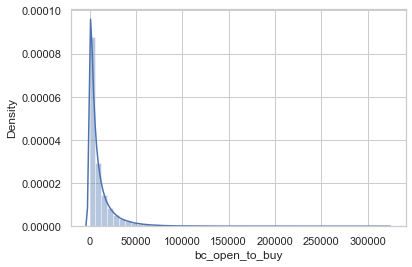

In [99]:


# column check "bc_open_to_buy"
# Total open to buy on revolving bankcards

sns.distplot(all_year_19["bc_open_to_buy"])

print("total na's :",sum(all_year_19["bc_open_to_buy"].isna()))
print("delta of na rlsd rtrn :",all_year_19.target_realised_return[all_year_19["bc_open_to_buy"].isna() ].mean()-mean_target_realised_return )

# with a low diffrande in mean and an understanding an NA represent the abesence of information we can fill with 0

fixed_value = 0 # most frequent value
all_year_19["bc_open_to_buy"] =  all_year_19["bc_open_to_buy"].fillna(fixed_value)





/Users/urisegman/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


total na's : 60
delta of na rlsd rtrn : 0.0038962753308143996


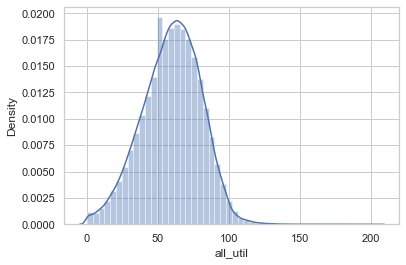

In [100]:
# column check "all_util"
# Description: Balance to credit limit on all trades

ax = sns.distplot(all_year_19["all_util"])


print("total na's :",sum(all_year_19["all_util"].isna()))
print("delta of na rlsd rtrn :",all_year_19.target_realised_return[all_year_19["all_util"].isna() ].mean()-mean_target_realised_return )

# with a low count and a low and simmiler mean there will be no affect on disterbution
fixed_value = all_year_19["all_util"].mean() #mean of normal disterbution

# filling na
all_year_19["all_util"] =  all_year_19["all_util"].fillna(fixed_value)

0.0    148051
1.0     44415
2.0     24475
3.0     15482
4.0     10491
Name: total_cu_tl, dtype: int64
total na's : 44
delta of na rlsd rtrn : -0.0019737644550816887


/Users/urisegman/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


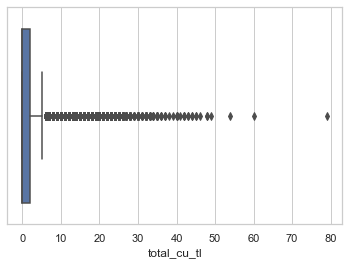

In [101]:
# column check "total_cu_tl"
# Number of finance trades

print(all_year_19["total_cu_tl"].value_counts().head())
sns.boxplot(all_year_19["total_cu_tl"])

print("total na's :",sum(all_year_19["total_cu_tl"].isna()))
print("delta of na rlsd rtrn :",all_year_19.target_realised_return[all_year_19["total_cu_tl"].isna() ].mean()-mean_target_realised_return )

# with a low count and a low and simmiler mean there will be no affect on disterbution

fixed_value = 0 # most frequent value
all_year_19["total_cu_tl"] =  all_year_19["total_cu_tl"].fillna(fixed_value)

<ipython-input-176-be9f6f5ffb77>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = all_year_19[['loan_amnt','funded_amnt','funded_amnt_inv', \


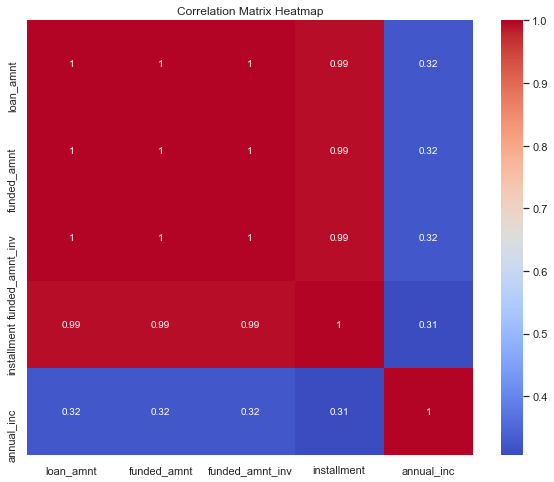

In [176]:
correlation_matrix = all_year_19[['loan_amnt','funded_amnt','funded_amnt_inv', \
                                  'int_rate','installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',\
                                 'home_ownership', 'annual_inc', 'verification_status',]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.title('Correlation Matrix Heatmap')
plt.show()

In [177]:
all_year_19.dtypes

id                                         int64
loan_amnt                                  int64
funded_amnt                                int64
funded_amnt_inv                          float64
int_rate                                  object
installment                              float64
grade                                     object
sub_grade                                 object
emp_title                                 object
emp_length                                object
home_ownership                            object
annual_inc                               float64
verification_status                       object
issue_d                           datetime64[ns]
target_loan_status                        object
url                                       object
purpose                                   object
title                                     object
zip_code                                  object
addr_state                                object
dti                 

In [169]:
all_year_19.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'target_loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'target_total_pymnt', 'target_recoveries',
       'last_pymnt_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total

In [102]:
# columns with since/past/current
# open_rv_12m
# open_rv_24m
# inq_last_12m
# mo_sin_old_il_acct
# mths_since_recent_bc
# mths_since_recent_bc_dlq
# mths_since_recent_inq
# mths_since_recent_revol_delinq
# num_tl_120dpd_2m
# max_bal_bc
# inq_fi
# bc_util

In [103]:
POTENTIAL_DATA_LEAKAG += [
   'open_rv_12m', 'open_rv_24m', 'inq_last_12m','mo_sin_old_il_acct',
    'mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq',
    'mths_since_recent_revol_delinq','num_tl_120dpd_2m','max_bal_bc','inq_fi','bc_util'
]

In [116]:
POTENTIAL_DATA_LEAKAG

['mths_since_rcnt_il',
 'open_il_24m',
 'open_il_12m',
 'open_act_il',
 'open_acc_6m',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_rv_12m',
 'open_rv_24m',
 'inq_last_12m',
 'mo_sin_old_il_acct',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_tl_120dpd_2m',
 'max_bal_bc',
 'inq_fi',
 'bc_util']

In [115]:
all_year_19.columns[all_year_19.isnull().sum() != 0]

Index(['emp_title', 'emp_length', 'mths_since_last_delinq',
       'mths_since_last_record', 'mths_since_last_major_derog', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'inq_fi', 'inq_last_12m',
       'bc_util', 'mo_sin_old_il_acct', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq'],
      dtype='object')

In [119]:
DF_FILTERED_OUT_COLUMNS.columns

Index(['member_id', 'desc', 'next_pymnt_d', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_perce

In [107]:
quarters = (len(all_year_19.columns) // 4)
for i in range(4):
    print(i)
    print(all_year_19.columns[(i)*quarters:(i+1)*quarters])

0
Index(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment',
       'target_grade', 'target_sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'target_loan_status', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths'],
      dtype='object')
1
Index(['mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'target_total_pymnt', 'target_recoveries',
       'last_pymnt_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il'],
      dtype='object')
2
Index(['il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_r

In [108]:
na_rate = (all_year_19.isna().sum() /  len(all_year_19))

In [109]:
na_rate_ge0 = na_rate[(na_rate > 0)]

In [110]:
print(na_rate_ge0[:len(na_rate_ge0)//2])
na_rate_ge0[len(na_rate_ge0)//2:]

emp_title                      0.072436
emp_length                     0.071947
mths_since_last_delinq         0.471749
mths_since_last_record         0.803281
mths_since_last_major_derog    0.706467
open_acc_6m                    0.000163
open_act_il                    0.000163
open_il_12m                    0.000163
open_il_24m                    0.000163
mths_since_rcnt_il             0.030228
dtype: float64


open_rv_12m                       0.000163
open_rv_24m                       0.000163
max_bal_bc                        0.000163
inq_fi                            0.000163
inq_last_12m                      0.000163
bc_util                           0.012018
mo_sin_old_il_acct                0.030083
mths_since_recent_bc              0.010835
mths_since_recent_bc_dlq          0.743293
mths_since_recent_inq             0.103042
mths_since_recent_revol_delinq    0.636082
dtype: float64

In [111]:

sns.displot(na_rate_small)
# # Assuming 'series' is the name of your pandas Series
# category_counts = na_rate_small.value_counts()
# # Plotting the categorical histogram
# plt.bar(category_counts.index, category_counts.values)
# plt.xlabel('Categories')
# plt.ylabel('Count')
# plt.title('Categorical Histogram')
# plt.xticks(rotation=90)  # Rotate x-axis labels if needed
# plt.show()

NameError: name 'na_rate_small' is not defined

In [112]:
for column in df.columns:
    most_common_value = df[column].mode()[0]
    df[column].fillna(most_common_value, inplace=True)

NameError: name 'df' is not defined

### Above we have some columns which are relevant for our target predictions like 'loan status' and 'total payment': these columns will be important for our model

In [113]:
percentage_change[(percentage_change <= .05 ) & (percentage_change!=0)]

int_rate                0.000104
installment             0.000108
verification_status     0.017430
total_rec_late_fee      0.024938
debt_settlement_flag    0.019400
dtype: float64

In [114]:
percentage_change

int_rate                   0.000104
installment                0.000108
verification_status        0.017430
loan_status                0.506217
out_prncp                  0.506039
out_prncp_inv              0.506039
total_pymnt                0.534341
total_pymnt_inv            0.534126
total_rec_prncp            0.480941
total_rec_int              0.482748
total_rec_late_fee         0.024938
recoveries                 0.075348
collection_recovery_fee    0.075348
last_pymnt_d               0.474194
last_pymnt_amnt            0.451118
last_credit_pull_d         0.811983
last_fico_range_high       0.753231
last_fico_range_low        0.753231
debt_settlement_flag       0.019400
dtype: float64

In [ ]:
# Plot the result
plt.bar(0, percentage)
plt.ylabel('Percentage')
plt.xticks([])
plt.title('Percentage of Expression Result')
plt.show()


In [ ]:
dddd
all_year_19['last_pymnt_d'] = all_year_19['last_pymnt_d'].astype(str)
all_year_19['issue_d'] = all_year_19['issue_d'].astype(str)
all_year_18['issue_d'] = all_year_18['issue_d'].astype(str)

In [ ]:
all_year_19['last_pymnt_d'] = all_year_19['last_pymnt_d'].replace('nan', 'Jan-2010')

In [ ]:
# Apply the conversion function to the column
all_year_19['last_pymnt_d'] = all_year_19['last_pymnt_d'].apply(convert_date)


In [ ]:
all_year_19['issue_d'] = all_year_19['issue_d'].apply(convert_date)
all_year_18['issue_d'] = all_year_18['issue_d'].apply(convert_date)

In [ ]:
all_year_19['issue_d']

In [ ]:
set(all_year_18['issue_d'] == all_year_19['issue_d'])

In [ ]:
all_year_19.last_pymnt_d

In [ ]:
all_year_19['last_pymnt_d'] = pd.to_datetime(all_year_19['last_pymnt_d'], format='%d/%m/%Y')
all_year_19['issue_d'] = pd.to_datetime(all_year_19['issue_d'], format='%d/%m/%Y')

In [ ]:
all_year_19['loan_lifetime_in_months'] = ((all_year_19.last_pymnt_d - all_year_19.issue_d)/np.timedelta64(1, 'M'))



In [ ]:
all_year_19['loan_lifetime_in_months'] = all_year_19['loan_lifetime_in_months'].astype(float)


In [ ]:
all_year_19['loan_lifetime_in_months'].describe()

In [ ]:
ids_that_are_relevant = all_year_19[(all_year_19.term == " 36 months") & (all_year_19.loan_status.isin(["Default","Charged Off","Fully Paid"]))].id



In [ ]:
all_year_19 = all_year_19[all_year_19['id'].isin(ids_that_are_relevant)]
all_year_18 = all_year_18[all_year_18['id'].isin(ids_that_are_relevant)]

In [ ]:
# in this line of code we argue that loans of 36 months are limited to 36 months

all_year_19['loan_lifetime_in_months'] = all_year_19['loan_lifetime_in_months'].clip(upper=36)

In [ ]:
all_year_19['loan_lifetime_in_months'].describe()

In [ ]:
all_year_18 = all_year_18[(all_year_19.term == " 36 months") & (all_year_19.loan_status.isin(["Default","Charged Off","Fully Paid"]))]
all_year_19 = all_year_19[(all_year_19.term == " 36 months") & (all_year_19.loan_status.isin(["Default","Charged Off","Fully Paid"]))]

In [ ]:
all_year_18.shape

In [ ]:
all_year_19.payment_lifetime.describe()
# for low values appiring by missing date (start or finish) 
# i assing max time (36 months ) for all negative values:
## it will only hurt (lower) relised return as 
## we asuming those payments are recived as late as possible
### values with 0 get 1 (its best to check in 18 tabbles)
months_vector = list(round(all_year_19.payment_lifetime/30.4))
for i in range(len(months_vector)) : 
    if months_vector[i] < 0 :
        months_vector[i] = 36
    # ! problem with 0 values ! change this ! 
    elif months_vector[i] == 0 : 
        months_vector[i] = 1
    # ! problem with 0 values ! change this ! 

In [ ]:
# now lets take another look
sum(np.array(months_vector) <= 0 )
all_year_19["months"] = months_vector
all_year_19.months.describe()

In [ ]:
# lets calculate the monthly payments 
all_year_19["monthly_paymnent"] = all_year_19["total_pymnt"] / all_year_19["months"]

In [ ]:
all_year_19.loan_status.unique()

In [ ]:
# now we can make shpithzer Monthly payments 
shpizer_payments = []

for _, row in all_year_19.iterrows():
    pymnts = [row['funded_amnt']*-1]  
    pymnts += [row['monthly_paymnent']] * int(row['months'])  
    shpizer_payments.append(pymnts) 

In [ ]:
# Monthly rate !
realised_rate = []
for i in shpizer_payments : 
    realised_rate.append(npf.irr(i))
# let's turn it to yearly
yearly_realised_rates = ((np.array(realised_rate) + 1)**12) -1 

In [ ]:
yearly_realised_rates

In [ ]:
# now we add that list to our Data Frame as relised rtrn
all_year_19["year_realised_return"] = yearly_realised_rates

In [ ]:
all_year_19.year_realised_return.describe()

In [ ]:
grade_groups_year_19 = all_year_19.groupby(["grade"])
grade_groups_year_19.mean().year_realised_return

In [ ]:
grade_groups_year_19.std().year_realised_return

In [ ]:
grade_groups_year_19 = all_year_19.groupby(["grade","sub_grade"])
grade_groups_year_19.mean().year_realised_return

In [ ]:
grade_groups_year_19 = all_year_19.groupby(["grade","sub_grade"])
grade_groups_year_19.std().year_realised_return

In [ ]:
# cheack 1 - lets make a worst case senario in which the payment is fully paid on the last month
worst_rlsd_rate = []
shpizer_payments_2 = []

for _, row in all_year_19.iterrows():
    pymnts = [row['funded_amnt']*-1]  
    pymnts += [0] * (int(row['months'])-1) 
    pymnts += [row['total_pymnt']]
    shpizer_payments_2.append(pymnts) 

In [ ]:
# here are the worst possible payments according to dates
shpizer_payments_2[0]

In [ ]:
# now agian using irr
# Monthly rate to yearly rate
worst_realised_rate = []
for i in shpizer_payments_2 :
    # Monthly rate to yearly rate
    worst_realised_rate.append(((npf.irr(i)+1)**12)-1)

In [ ]:
all_year_19["worst_realised_rate"] = worst_realised_rate 

In [ ]:
all_year_19.worst_realised_rate.describe()

In [ ]:
grade_groups_year_19 = all_year_19.groupby(["grade","sub_grade"])
grade_groups_year_19.mean().worst_realised_rate

In [ ]:
## now lets see what makes some loans have over 100% realised int rate
check1 = all_year_19[["funded_amnt","total_pymnt","months","monthly_paymnent","year_realised_return","int_rate","worst_realised_rate"]][all_year_19.year_realised_return >= 1]

In [ ]:
# check1.year_realised_return.describe()
check1.year_realised_return.sort_values(ascending=False)

In [ ]:
# only 8 loans 
check1 

In [ ]:
# thats wired... lets have a closer look 
((npf.irr([-20000,5881,5881,5881,5881])+1)**12)-1
((npf.irr([-2000,2166])+1)**12)-1
# ok, lets check how they have low months
check2 = all_year_19[["issue_d","last_pymnt_d","months","funded_amnt","total_pymnt","year_realised_return"]][all_year_19.year_realised_return >= 1]

In [ ]:
check2
# they acually look valid... :( 
# we can again think of if irr asumption (reinvesting) is the best fit for us....
# maybe if we set an YTM% of 2% as the reinvesment rate in the IRR ?..?..?..?..? 

In [ ]:
# Assuming reinvestment at a specific rate (2% yearly)
reinvestment_rate = 0.02

# Monthly rate!
realized_rate = []
for i in shpizer_payments:
    realized_rate.append(npf.mirr(i, reinvestment_rate, reinvestment_rate/12))

# Calculate realized rates with specified reinvestment rate
yearly_realized_rates = ((np.array(realized_rate) + 1) ** 12) - 1

In [ ]:
len(all_year_19.columns),len(all_year_18.columns)

In [ ]:
columns_19 = list(all_year_19.columns)

In [ ]:
# these are all the 18 features that are not included in 19
exclude_18 = all_year_18.columns[all_year_18.columns.isin(all_year_19)== False ]
exclude_18

In [ ]:
# these are all the 19 features that are not included in 18
exclude_19 = all_year_19.columns[all_year_19.columns.isin(all_year_18)== False ]
exclude_19

In [ ]:
# we want to check for perminant data - all of this are not ! 
all_year_19_copy = all_year_19.drop(columns=exclude_19)
all_year_18_copy = all_year_18.drop(columns=exclude_18)